In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime
import re
from email import utils

1) Log file is loaded

In [61]:
file = open("log.txt", "r") 
lines = file.readlines()
for l in range(3): print(lines[l][:-1])

156.15.13.173 [01/Jan/2018:11:13:49 +0100] "GET AddProduct.html HTTP/1.0" 200 2356
176.247.135.49 [01/Jan/2018:11:18:07 +0100] "GET Shop.html HTTP/1.0" 200 7466
176.247.135.49 [01/Jan/2018:11:19:05 +0100] "GET AddProduct.html HTTP/1.0" 200 2356


2) Cass "Request" parses and keeps data of a single requests. Complete the TODO, where a given "line" (string) should be parsed in order to dervie the ip of the host making the request, time of the request (in seconds), and target page (name).

In [72]:

class Request:
    def __init__(self, log):
        # TODO DO PARSING HERE
        for log_part in log.split():
            try:
                ip = re.findall(r'(?:\d{1,3}\.){3}\d{1,3}', log_part)
            except ValueError:
                pass
            else:
                self.ip = ip[0]
                break

        for log_part in log.split():
            if log_part[0] == '[':
                hours = int(log_part.split(':')[1])*3600
                minutes = int(log_part.split(':')[2])*60
                self.time = int(log_part.split(':')[3]) + minutes + hours
            elif log_part.endswith('.html'):
                self.page = log_part

        # convert hours + minutes + seconds -> total number of seconds
        
    def __repr__(self):
        return self.ip + "     " +  str(datetime.timedelta(seconds=self.time)) + " -> " + self.page

3) Each line of log.txt is parsed and the Request objects are added to the list

In [196]:
reqs = [Request(line) for line in lines]
for l in range(10): 
    print(reqs[l]) 

156.15.13.173     11:13:49 -> AddProduct.html
176.247.135.49     11:18:07 -> Shop.html
176.247.135.49     11:19:05 -> AddProduct.html
176.247.135.49     11:29:05 -> Summary.html
69.84.30.199     11:43:59 -> Shop.html
69.84.30.199     11:45:16 -> AddProduct.html
57.116.45.120     11:46:45 -> AddProduct.html
69.84.30.199     11:50:36 -> Summary.html
69.84.30.199     11:52:38 -> Payment.html
26.19.183.202     11:53:11 -> AddProduct.html


# Exercise

Your task is to analyze the log file. You should indentify the users and sessions. Then, compute the following: <br>
3.1) the number of sessions (should be 1000 :) ), <br>
3.2) the number of users, <br>
3.3) the average number of sessions per one user <br>
3.4) use the distribution plot to visualize the sessions' lengths (minutes);  <br>
3.5) use the distribution plot to visualize the sessions' lengths (the number of requests) <br>
3.6) use the distribution plot to visualize sessions' starting times (hours). <br>
3.7) which web page is the most common entry point?; for each page plot the number of times it has been an entry page,  <br>
3.8) which web page is the most common departure point?; for each page plot the number of times the user stopped a session while being on this page, <br>
3.9) for each page plot the average time the user stayed on this page <br>
3.10) print the fist 10 sessions (paths). <br>

You may find the following classes helpful and data.

3.1) The number of sessions: 1000
3.2) The number of users: 391
3.3) The average number of sessions per one user: 2.56


[]

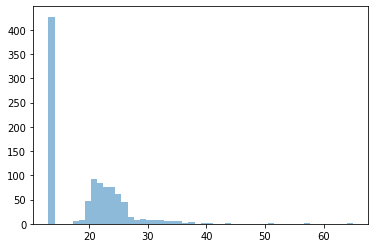

In [247]:
class Session:
    def __init__(self,startTime,stopTime,requests,threshold):
        self.startTime = startTime
        self.stopTime = stopTime
        self.requests = requests
        self.sessionLen = round((stopTime - startTime + threshold)/60,0)
        
    def __repr__(self):
        print("SESSION")
        print(self.startTime)
        print(self.stopTime)
        print("Session length: " + str(int(self.sessionLen))+ "min")
        STR = ""
        for r in self.requests:
            print(r)
            STR += ("  " + r.page + "    " + str(datetime.timedelta(seconds=r.time)) + "\n")
        return STR

class Computer:
    def __init__(self):
        self.ip = []
        self.sessions = []
    def __repr__(self):
        return self.ip

PAGES = ["Shop.html", "AddProduct.html", "Summary.html", "Payment.html","About.html", "Contact.html"]

LINKS = [[1, 4],
         [2,4],
         [3],
         [],
         [1,5],
         []]

users = {}
sessions = []
for req in reqs:
    r = str(req).split()
    
    if r[0] not in users:
        users[r[0]] = []
    users[r[0]].append(req)

threshold = 765
for i in users.keys():
    c = 1
    startTime = -1
    requests = []
    for j in users[i]:
        if startTime == -1:
            startTime = j.time
        requests.append(j)
        try:
            k = users[i][c]
        except:
            sessions.append(Session(startTime,j.time,requests,threshold))
        else:
            if k.time - j.time > threshold:
                sessions.append(Session(startTime,j.time,requests,threshold))
                startTime = k.time
                requests = []

        c += 1

    # sessions.append(Session(startTime,j.time,requests,threshold))
    startTime = -1
    requests = []

print("3.1) The number of sessions: " + str(len(sessions)))
print("3.2) The number of users: " + str(len(users.keys())))
print("3.3) The average number of sessions per one user: " + str(round(len(sessions)/len(users.keys()),2)))

# plot distribution
count, bins, ignored = plt.hist([i.sessionLen for i in sessions], 50, alpha=0.5)
plt.plot()

# x_axis = np.arange(len(pages))
# plt.bar(x_axis, data, align='center', alpha=0.5)
# plt.xticks(y_pos, pages, rotation=90)